$\qquad$ $\qquad$$\qquad$  **TDA 231 Machine Learning: Homework 5** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: Clustering**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Aristide** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 21/5** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Rikard Olsson, 900713-0355, rikolss@student.chalmers.se** <br />
$\qquad$ $\qquad$$\qquad$      **and by: Sharan Sabi, 951207-7554, ssharan@student.chalmers.se**
<br />

General guidelines:
* Since there is no theoretical part for this assigment, submit this ipynb only (with completed code/results).
* All discussion regarding practical problems, along with solutions and plots should be specified here itself. We will not generate the solutions/plots again by running your code.
* Your name, personal number and email address should be specified above.
* All datasets can be downloaded from the course website.
* All plots/tables and other relevant information should be included.

# Practical problems

The follwing code might be useful for this excercise.

```python
import scipy.io
mat = scipy.io.loadmat('hw5_p1a.mat')
print (mat.keys())
X = mat['X']
```

## [K-Means Implementation, 20 points]

a. Implement the basic (linear) $k$-means algorithm as described in the lecture, using the euclidean distance. Use (uniformly) random points from the data as initialization for the centroids. Terminate the iterative procedure when the the cluster assignments do not change.

b. Run your implementation on the matrix $X$ in **hw5_p1a.mat** with $k=2$. Each row of the matrix is an observation, and each column is a feature. Store the cluster assignment both after 2 iterations, and at convergence. Produce a scatter plot of the data with colors indicating the cluster assignments at convergence and highlight points that have changed assignment after the second iteration.

c. Implement the kernel $k$-means algorithm as described in the lecture, using the Gaussian RBF-kernel.


d. Run the linear $k$-means **and** your kernel $k$-means on **hw5_p1b.mat** with $k=2$. For the Gaussian RBF-kernel, use $\sigma=0.2$. Produce scatter plots of the data, with color indicating the cluster assignment at convergence, one plot for each of the algorithms.

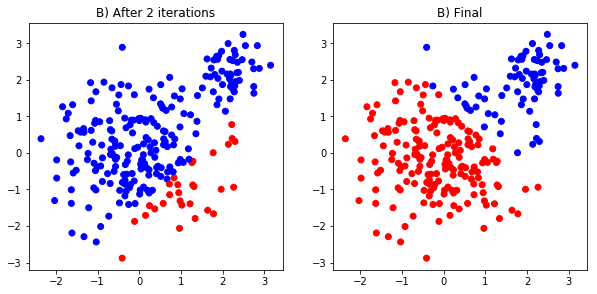

KeyboardInterrupt: 

In [102]:
import scipy.io
import numpy as np
import copy
import matplotlib.pyplot as plt

mat = scipy.io.loadmat('hw5_p1a.mat')
X = mat['X']

################################################## a) b) #############################################
def k_means(X, K):
    # Calculates new mu as given in lecture notes 
    def new_mu(z,k,x):
        numerator = np.zeros(2)
        for i in range(0,len(x)):
            numerator += x[i] * z[k][i]

        d = 0
        for j in range(0,len(z[k])):
            d += z[k][j]

        return numerator / d

    # FOR B) store cluster assignments after 2 iterations and convergence
    iterations = 0
    clusters = []
    
    # Define z as the centriods for which the points are assigned to
    z = {}
    for i in range(0,K):
        z[i] = {}

    # Define mu as the centroids
    mu = []

    # Guess their centroids by random (qualified random guess :)
    for i in range(0,K):
        mu.append([np.random.uniform(-3,3),np.random.uniform(-3,3)])

    # Run until the mu's are not changed anymore
    while True:
        
        # Increament iterations
        iterations += 1

        # Create a deep copy of z to compare with if z has changed
        z_n = copy.deepcopy(z)
        mu_n = copy.deepcopy(mu)

        # Calculate the distance from every point to each mu's
        for i in range(0, len(X)):
            p = X[i]

            # Define a m_short to indicate which mu that had shortest distance to point p
            mu_short = {
               "dis": 99,
               "index": -1
            }

            # Calculate which mu has shortest distance
            for m_i in range(0,len(mu)):
                dis = np.linalg.norm(p,mu[m_i])
                if dis < mu_short["dis"]:
                    mu_short["dis"] = dis
                    mu_short["index"] = m_i

            # Assign the point to the closest mu
            z[mu_short["index"]][i] = 1

            # Assign 0 to every other mu for this point 
            for k in range(0,K):
                if not (mu_short["index"] == k):
                    z[k][i] = 0

        # Calculate new mu's
        for k in range(0,K):
            mu[k] = new_mu(z,k,X)

        # Check if z's or mu's are equal is different
        if np.array_equal(z, z_n) or np.array_equal(mu, mu_n):
            break
            
        # FOR B) store clusters (z)
        if iterations == 2:
            clusters.append(z_n)
        
    # FOR B) store clusters at convergence
    clusters.append(z)
        
    # At this point, the mu's are "optimal" (could be local optimum)
    return mu, z, clusters

mu, clusters = k_means(X,2)

# Plot when 2 iterations
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax1.set_title("B) After 2 iterations")
colors_1 = []
for i in range(0, len(clusters[0][0])):
    if clusters[0][0][i] == 1:
        colors_1.append("r")
    else:
        colors_1.append("b")
ax1.scatter(X[:,0],X[:,1],color=colors_1)

# Plot when convergence reached
ax2 = fig.add_subplot(222)
ax2.set_title("B) Final")
colors_2 = []
for i in range(0, len(clusters[1][0])):
    if clusters[1][0][i] == 1:
        colors_2.append("r")
    else:
        colors_2.append("b")
ax2.scatter(X[:,0],X[:,1],color=colors_2)

################
# Show 
plt.show()

################################################## c) #############################################
mat = scipy.io.loadmat('hw5_p1b.mat')
Y = mat['X']

def kernal_k_means(X, K, sigma):
    
    # RBF Kernal
    def rbf(x1, x2, sigma):
        delta = abs(np.subtract(x1, x2))
        squaredEuclidean = np.square(delta)
        result = np.exp(-(squaredEuclidean)/(2*sigma**2))
        return result
    
    def distance(x,mu):
        # first term
        k = rbf(x1,x2,sigma)
        # second term
        st = 0
        for i in range(0,length):
            
    
    # Data length
    length = len(X)
    
    # Define z as the centriods for which the points are assigned to
    z = {}
    for k in range(0,K):
        z[k] = {}
        # Assign random points to z_nk
        for n in range(0,length):
            if np.random.uniform() > 0.5:
                z[k][n] = 1
            else:
                z[k][n] = 0
    
    
    